# L01 - Intro.ipynb Problems
## Setup
Setup containing code from Intro.ipynb, which is needed for the problems.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#print("OK")

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

#### Setup: Set data path
Setting the data path

In [2]:
import os
datapath = "datasets/lifesat"

print("Datapath: " + datapath + "/oecd_bli_2015.csv")

Datapath: datasets/lifesat/oecd_bli_2015.csv


#### Setup: Code example

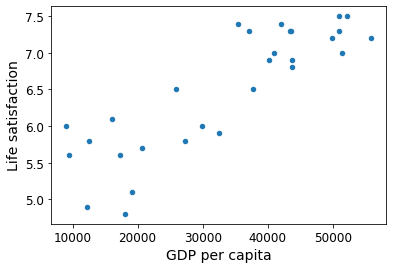

Linear regression predicts Cyprus life satisfaction as: 5.962423376619662


In [3]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli       = pd.read_csv(datapath + "/oecd_bli_2015.csv", thousands = ',')
gdp_per_capita = pd.read_csv(datapath + "/gdp_per_capita.csv",thousands=',',delimiter='\t',
                         encoding='latin1', na_values="n/a")
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new     = [[22587]]  # Cyprus' GDP per capita
y_predlin = model.predict(X_new)

print(f"Linear regression predicts Cyprus life satisfaction as: {y_predlin[0][0]}") 

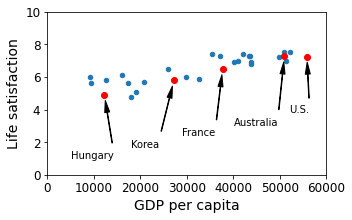

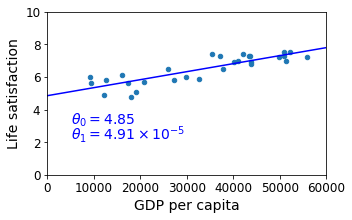

In [4]:
oecd_bli = pd.read_csv(datapath + "/oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"/gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

#print("OK")

## Qa) The $\theta$ parameters and the $R^2$ Score

### $R^2$ Score / Coefficient of determination
The score of the model is extracted as

In [5]:
R2lin = model.score(X, y)
print(f"R2 value of the linear regression model is {round(R2lin,4)}")

R2 value of the linear regression model is 0.7344


The $R^2$ score in linear regression is a comparison of the regression to a horizontal line, to see how much better the regression fits the data. </br>

1 is the best value of $R^2$. A score closer to 1 is better. If the score is 0, it means that the model fits as well as a horizontal line, while negatvie values mean the model fit worse than a horizontal line.
$R^2$ can at most have a value of 1, but can go negative infinitely.  </br>

$R^2$ is not a loss or objective function, but a function that measures the fitness of the model.

## $\theta$ values
For the linear regression model, the theta values are the coefficient and interception of the linear model. These can be extracted as:

In [6]:
Theta1 = model.coef_
Theta2 = model.intercept_
print(f"Theta1 (Coefficient) has a value of: {Theta1[0][0]}")
print(f"Theta2 (Intercept) has a value of: {Theta2[0]}")

Theta1 (Coefficient) has a value of: 4.9115445891584845e-05
Theta2 (Intercept) has a value of: 4.853052800266435


### Qb) Using k-Nearest Neighbors

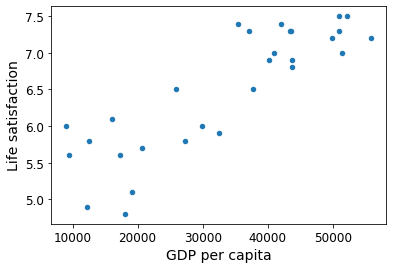

k-Nearest Neighbors predicts Cyprus life satisfaction as: 5.7667
R2 value of the linear regression model is 0.8526


In [7]:
#Import k-Nearest Neighbors part of sklearn
import sklearn.neighbors

# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select K-nearest neighbors model with k = 3
k = 3
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors = k)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_predk = knn.predict(X_new)

print(f"k-Nearest Neighbors predicts Cyprus life satisfaction as: {round(y_predk[0][0],4)}") 

# Find score
R2k = knn.score(X,y)
print(f"R2 value of the linear regression model is {round(R2k,4)}")

#### Comparison
Using a K-Nearest Neighbors model with number of neighbors used at 3 (k = 3), the model predicts the life satisfaction of Cyprus at 5.766.
This is significantly closer to the true value of 5.77 than the linear regression model, which prediced 5.962.

#### Score method
The k-Nearest Neighbors model uses $R^2$ model for scoring ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score)), like the linear regression model. Since the same scoring mehtod is used, they are comparable. The k-Nearest Neighbors model ($R^2 = 0.8526$) is better in this case than the Linear Regression model ($R^2 = 0.7344$). 
***

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

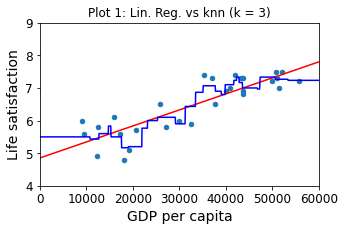

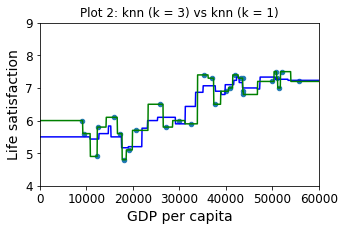

In [8]:
# Train model with k = 1
knn1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 1)
knn1.fit(X, y)

# Initiate two plots with sample data
plot1 = sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', title = "Plot 1: Lin. Reg. vs knn (k = 3)", figsize=(5,3))
plot1.axis([0, 60000, 4, 9])

plot2 = sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', title = "Plot 2: knn (k = 3) vs knn (k = 1)", figsize=(5,3))
plot2.axis([0, 60000, 4, 9])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)
y_pred_knn1 = knn1.predict(M)

# use plt.plot to plot x-y into the sample_data plot..
plot1.plot(m, y_pred_lin, "r")
plot1.plot(m, y_pred_knn, "b")

plot2.plot(m, y_pred_knn, "b")
plot2.plot(m, y_pred_knn1, "g")


The knn model with k = 1 has a perfect score of 1, since the prediction is based on the value of only one neighboring datapoint, and so will always match the nearest datapoint perfectly. However, this also means that the predictions will ONLY end up at the datapoint values, as can be seen on the green line in plot 2. So while the score is perfect, the model does not predict the trend of the data. 
Using a model with more neighbors, like k = 3, begins to capture the trend of the data, rather than just the datapoint values.
***

### Qd) Trying out a Neural Network
First cell has output supressed, to avoid iterations being printed. Second cell shows results.

In [9]:
%%capture

from sklearn.neural_network import MLPRegressor

# Initiate plot
plot1 = sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', title = "Plot 1: Lin. Reg. vs knn (k = 3)", figsize=(5,3))
#plot1.axis([0, 60000, 4, 9])

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-4, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel());

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) ;

# Plotting
plot1.plot(m, y_pred_lin, "r")
plot1.plot(m, y_pred_knn, "b")
plot1.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred_mlp = mlp.predict(X_new)

k-Nearest Neighbors predicts Cyprus life satisfaction as: [4.06220456]
R2 value of the linear regression model is -3.67563291370252


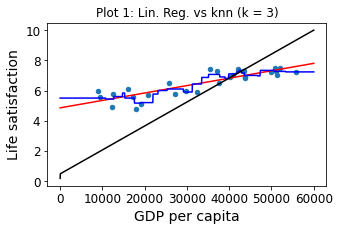

In [10]:
print(f"k-Nearest Neighbors predicts Cyprus life satisfaction as: {y_pred_mlp}") 

# Find score
R2mlp = mlp.score(X,y)
print(f"R2 value of the linear regression model is {R2mlp}")

plot1 = sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', title = "Plot 1: Lin. Reg. vs knn (k = 3)", figsize=(5,3))
#plot1.axis([0, 60000, 4, 9])

# Plotting
plot1.plot(m, y_pred_lin, "r")
plot1.plot(m, y_pred_knn, "b")
# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) ;
plot1.plot(m, y_pred_mlp, "k")

The MLPregressor does not predict the life satisfaction in Cyprus very well. This also shows in the score, which frequently becomes (very) negative. The score is again the same type ($R^2$) as for Linear Regression and KNN, so they can be compared. 
***

# L01 - modules_and_classes.ipynb Problems

## Qa) Load and test the `libitmal` module

The GITMAL-master folder was placed in the C:/user/username folder.
Adding the directory to the path using both the GUI and console did not produce any results. The path showed up as expected in the Windows Systems screens, but libitmal could not be accessed. </br>
Instead, it was added to the path using the sys and os packages, as described in modules_and_classes.ipynb.

In [11]:
import sys,os
sys.path.append(os.path.expanduser('~/GITMAL-master'))

from libitmal import utils as itmalutils
itmalutils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


***
## Qb Create your own module, with some functions, and test it
For this, i've created my own folder in C/user/username, called my_library. A dummy module, dummy1, is located in this folder. The folder is appended to the path the same way GITMAL-master was in Qa). </br>
The dummy module is then loaded, and three functions are run from it. A highfive function which prints a highfive, a diceroller function which takes user input and casts a die, and an function which takes two numbers as inputs and adds them.

In [13]:
import importlib
import sys,os
sys.path.append(os.path.expanduser('~/my_library'))

import dummy1 as dum

importlib.reload(dum)

# Test highFive() function, which prints a highfive.
print("--- Test highFive() --- \n")
dum.highFive()
print("\n")

# Test diceroller function, which rolls a dice.
print("--- Test rollDice() --- \n")
dum.rollDice()
print("\n")

# Test addNumbers(), which adds two numbers
print("--- Test rollDice() --- \n")
dum.addNumbers(3,7)
print("\n")


--- Test highFive() --- 

ヘ( ^o^)ノ＼(^_^ )


--- Test rollDice() --- 



Do you want to roll the dice? Y/N:  N


See you.


--- Test rollDice() --- 

10




***
## Qc How do you 'recompile' a module?

There are several ways to force jupyter to reload a module. Restarting the kernel will make sure everything is reloaded on the next run, but is not a very elegant solution. </br>

The package `importlib` ([source](https://docs.python.org/3/library/importlib.html)) has a reload function, which reloads modules. This was used in Qb). Using `importlib`, one can control which modules are reloaded.</br>

Alternatively, all modules can be set to autoreload using the autoreload module as: </br>
```python
%load_ext autoreloa
%autoreload 2
```
This makes sure all modules are reloaded when executing code, but is disabled by default.

***
## Qe Extend the class with some public and private functions and member variables
Private functions and memebr variables in Python are represented with double underscores, `__` , as the first letters in the name. The following example shows a class with a private and a public variable, a private and a public method, and what happens when trying to call them.

In [14]:
# class with a private function using "__"
class MyClass:
    var    = "blah"
    __var2 = "bleh"
    
    def myfun_public(self):
        print("This is a public function")
    
    def __myfun_private(self):
        print("This is a private function")

# This will display the message from the public function
c1 = MyClass()
c1.myfun_public()

# This will try to call the private function, but fail, and give an AttributeError.
try:
    c1.__myfun_private()
except AttributeError:
    print("Error: AttributeError. Cannot call the private function.")
    
#This will call the public variable, thend the private:
print("This is the public variable: " + c1.var)

try:
    print("This is the private variable: " + c1.__var2)
except AttributeError:
    print("Error: AttributeError. Cannot access the private variable.")

This is a public function
Error: AttributeError. Cannot call the private function.
This is the public variable: blah
Error: AttributeError. Cannot access the private variable.


#### Self
`self` always refers to the particular instance of a class.

If we dont include `self` as the first argument for a method in a class, the method will not be available through an instance of a class, but only through the class. </br>
The following example shows what happens when a method in a class does NOT have `self` as the first argument. It results in a TypeError when trying to call it using the instance, since self refers to the instance. It can, however, be called directly from the class. 

In [15]:
#For a class in which a method does NOT have self as the first argument, the method can only be used through the class, not the instance.
class MyClass:
    def myfun():
        print("hi")

a = MyClass() #Instance of the class

#This will print "hi"
MyClass.myfun()

#This cannot print "hi"
a.myfun()
    

hi


TypeError: myfun() takes 0 positional arguments but 1 was given

The next example shows what happens what a method in a class DOES have self as the first argument. Calling it from the instance works, but now calling it from the class results in a TypeError, since the class does not have an instance to pass to the method, as it needs due to the `self` argument.

In [16]:
#For a class in which a method DOES have self as the first argument, the method can only be used through the instance, not the class.
class MyClass:
    def myfun(self):
        print("hi")

a = MyClass() #Instance of the class

#This will print "hi"
a.myfun()

#This will not print "hi"
MyClass.myfun()

hi


TypeError: myfun() missing 1 required positional argument: 'self'

***
## Qf Extend the class with a Constructor

__Constructor__ </br>
In Python, when calling a class, the constructor is used to instantiate an instance of the class. It is always called when an object is created. The constructor is called `__init__` in Python. For a default constructor, it only takes the `self` argument. For a parameterized constructor, it it takes the `self` argument, as well as others defined by the programmer. The constructor is defined in a class as
```python
def __init__(self): 
    #Body
```
__Destructor__</br>
Destructors are called when an object is destroyed. It is called `__del__` in Python. It is not needed so much, since Python is a garbage collector, that automatically handles memory. So while Python does have a destructor we can use to manually destory an object, it also does this automatically.

***
## Qg Extend the class with a to-string function

In Python, the `str()` and `print()` commands, when used on an object, calls the `__str__` method of the class. This is implemented as the `tostring` method of the class MyClass, which is simply a method that calls the str() command on the instance using `self`.

In [17]:
# Example
class MyClass:
    def tostring(self):
        str(self)

a = MyClass() #Instance of the class

print(str(a))
print(a.tostring)

<bound method MyClass.tostring of <__main__.MyClass object at 0x0000021852A47550>>


# L01 - cost_function.ipynb Problems

## Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$

In [18]:
# Qa

import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

# Construct X matrix
X = np.array([
        [1, 2, 3],
        [4, 2, 1],
        [3, 8, 5],
        [-9, -1, 0],
        ])
print(X)

[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


## Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

In [19]:
## L1 and L2 using explicit implementation

def L1(V):
    L1 = 0 #Start length at 0
    for x in V: #Sum all elements x
        L1 = L1 + (x**2)**0.5
    return L1  

def L2(V):
    L2 = 0 #Start length at 0
    for x in V: #Sum all elements of x^2
        L2 = L2 + ((x**2)**0.5)**2
    
    L2 = L2**0.5 #Take square root of sum
    return L2

#L2 using np.dot
def L2Dot(V):
    import numpy as np
    
    L2Dot = np.dot(V.T, V) #Find dot product
    
    L2Dot = np.sqrt(L2Dot) #Take square root of dot product
    
    return L2Dot

In [20]:
# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 

import math

assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

#comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


## Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

Call the function RMSE, and evaluate it using the $\bX$ matrix and $\by$ from Qa.

We implement a dummy hypothesis function, that just takes the first column of $\bX$ as its 'prediction'

$$
    h\st{dummy}(\bX) = \bX(:,0)
$$

Do not re-implement the $\norm{2}$ for the RMSE function, but call the '''L2''' function you just implemented internally in RMSE.

In [21]:
# TODO: solve Qc...implement your RMSE function here
assert False, "TODO: solve Qc, and remove me.."

def RMSE (ypred, y):
    MSE = 1/len(ypred)*L2(ypred - y)**2

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

AssertionError: TODO: solve Qc, and remove me..